In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv("combined.csv")

def convertToFloat(x):
    x=x.strip()
    if x=="-" or x=="NR" or x=='' or x=="." or x=="" or x==' ':
        return 0.01
    else:
        
        return float(x)

def convertToFloat2(x):
    x=x.strip()
    if x=="-" or x=="NR" or x=='' or x=="." or x=="" or x==' ':
        return 0
    else:
        
        return float(x)


df["rain"]=df["Rain"].apply(convertToFloat2)
import datetime
df["month"]=df["Date"].apply(lambda x:datetime.datetime.strptime(x,"%Y-%m-%d").month)
df["year"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").year)
df["day"]=df["Date"].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").day)




def SparseMeasure(x):
    if x ==1 or x==3:
        return 0
    elif x==2 or x==4 or x==12:
        return 1
    elif x==5 or x==6:
        return 2
    elif x==7 or x==10:
        return 3
    else: 
        return 4

def meandictfunc(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    meanval=meandict[daymonth]
    return meanval

def RainCompress(x):
    if x>100:
        return 5
    if x>50:
        return 4
    if x>25:
        return 3
    if x>2:
        return 2
    elif x!=0:
        return 1
 
    else:
        return 0
def get_season(x):
    if x>=1 or x<=4:
        return 0
    elif x>=5 or x<=9:
        return 2
    elif x>9 or x<12:
        return 1
    else:
        return 0
def isSparse(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=meandict[daymonth]
    if val<1:
        return 0
    elif val>=1 or val<2.5:
        return 4
    elif val>=2.5 or val<4:
        return 8
    else:
        return 12

def lastseventh(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-7]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val
def lastsixth(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-6]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val
    
def lastfifth(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-5]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val

 
def lastfourth(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-4]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val

def lastthrid(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-3]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val

def lastsecond(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-2]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val

def lastfirst(row):
    daymonth=str(row["day"])+"_"+str(row["month"])
    val=MonDay[daymonth][-1]
    if val==0:
        return 0
    else:
        return np.log(val)
    return val
def last(row,k):
    daymonth=str(row["District"])+"_"+str(row["day"])+"_"+str(row["month"])
    if k<len(MonDay[daymonth]):
        val=MonDay[daymonth][-k]
    else:
        val=0
    final=RainCompress(val)
    return final
    


In [2]:
df.to_csv("converted.csv",index=False)

In [2]:
yearlist=df.year.unique()
MonDay={}
for year in yearlist:
    yeardf=df[df.year==year]
    for frame,row in yeardf.iterrows():
        monthday=str(row["District"])+"_"+str(row["day"])+"_"+str(row["month"])
        if monthday not in MonDay.keys():
            MonDay[monthday]=[]
        
        MonDay[monthday].append(row["rain"])

meandict={}
for key in MonDay.keys():
    themean=np.mean(np.array(MonDay[key]))
    if themean==0.0:
        meandict[key]=themean
    else:
        meandict[key]=themean

In [32]:
len(MonDay["Alangayam_1_6"])

10

In [3]:
df["is_rain"]=df["month"].apply(get_season)
# df["sparse1"]=df.apply(lastfirst,axis=1)
# df["sparse2"]=df.apply(lastsecond,axis=1)
# df["sparse3"]=df.apply(lastthrid,axis=1)
# df["sparse4"]=df.apply(lastfourth,axis=1)
# df["sparse5"]=df.apply(lastfifth,axis=1)
# df["sparse6"]=df.apply(lastsixth,axis=1)
# df["sparse7"]=df.apply(lastseventh,axis=1)
for i in range(1,9):
    sparse="previous"+str(i)
    df[sparse]=df.apply(last,k=i,axis=1)
# df["sparse"]=df.apply(isSparse,axis=1)

In [4]:
X_train

NameError: name 'X_train' is not defined

In [140]:
df["new2"]=df.apply(meandictfunc,axis=1)
# df["rain"]=df["rain"].apply(lambda x: np.log(x))
# df["year"]=df["year"].apply(lambda x: np.log(x))
# df["new2"].apply(lambda x: np.log(x))
# df["new"]=df["month"].apply(SparseMeasure)


In [13]:
dummydf=pd.get_dummies(df[["District","rain","month","is_rain","day","year","previous1","previous2","previous3","previous4","previous5","previous6","previous7","previous8"]])
# dummydf=pd.get_dummies(df[["District","rain","month","day","year"]])


In [14]:
y=dummydf.pop("rain")
x=dummydf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.33, random_state=42)

In [15]:
import xgboost as xg
xgb_r = xg.XGBRegressor(objective ='reg:squarederror',    
                  n_estimators =3, seed = 123,max_depth=35,eta=0.3)
   
# Fitting the model
import time
xgb_r.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=35,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=3, n_jobs=12, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [16]:
X_test

,month,is_rain,day,year,previous1,previous2,previous3,previous4,previous5,previous6,...,District_Melalathur,District_Natrampalli,District_Ponnai,District_Sholingur,District_TCS Mill,District_Tirupattur,District_VCS Mill,District_Vaniyambadi,District_Vellore,District_Wallajah
35844,3,0,29,2018,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
18346,4,0,1,2014,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8140,12,0,3,2011,2,0,2,3,2,2,...,0,0,0,0,0,0,0,0,0,0
43290,7,0,18,2019,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
40376,2,0,6,2019,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,4,0,26,2010,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
13166,1,0,25,2013,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45618,11,0,24,2019,0,2,0,0,2,0,...,0,0,0,0,0,0,0,0,1,0
44814,10,0,10,2019,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [17]:
from sklearn.metrics import mean_absolute_error
pred=xgb_r.predict(X_test)
predtrain=xgb_r.predict(X_train)
for i in range(len(pred)):
    if pred[i]<=1:
        pred[i]=0
for i in range(len(predtrain)):
    if predtrain[i]<=1:
        predtrain[i]=0
from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_train,predtrain)))
print(np.sqrt(mean_squared_error(y_test,pred) ))
print(mean_absolute_error(y_test,pred))


4.099899875285234
5.725427581558085
1.5726110230848696
C:\Users\om purohit\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [8]:
np.corrcoef(y_test,pred)

array([[1.       , 0.7983907],
       [0.7983907, 1.       ]])

In [31]:
RAE(y_test,pred)

0.6429144234554618

In [49]:
RRSE(y_test,pred)

0.6684320725795425

In [9]:
firstdf=df[df.year==2019]
seconddf=x[x.year==2019]

In [10]:
firstdf=firstdf[firstdf.month==8]
seconddf=seconddf[seconddf.month==8]

In [11]:
firstdf=firstdf[firstdf.District=="Alangayam"]
seconddf=seconddf[seconddf.District_Alangayam==1]

In [10]:
seconddf.shape

(31, 29)

,Date,District,Rain,rain,month,year,day,is_rain,previous1,previous2,previous3,previous4,previous5,previous6,previous7,previous8
2332,2010-08-01,Alangayam,-,0.0,8,2010,1,0,0,0,4,0,2,0,0,0
2343,2010-08-02,Alangayam,-,0.0,8,2010,2,0,0,2,3,0,0,2,0,3
2354,2010-08-03,Alangayam,-,0.0,8,2010,3,0,0,0,0,0,3,2,0,0
2365,2010-08-04,Alangayam,-,0.0,8,2010,4,0,0,0,0,0,0,2,2,3
2376,2010-08-05,Alangayam,-,0.0,8,2010,5,0,0,0,0,0,2,0,2,0
2387,2010-08-06,Alangayam,-,0.0,8,2010,6,0,0,0,2,0,2,2,0,0
2398,2010-08-07,Alangayam,-,0.0,8,2010,7,0,0,0,0,0,2,2,0,0
2409,2010-08-08,Alangayam,-,0.0,8,2010,8,0,0,0,2,0,2,2,2,0
2420,2010-08-09,Alangayam,-,0.0,8,2010,9,0,0,0,2,0,2,2,0,2
2431,2010-08-10,Alangayam,-,0.0,8,2010,10,0,0,0,2,0,2,2,0,0


In [31]:
pred=svr.predict(seconddf)
for i in range(len(pred)):
    if pred[i]<=1:
       pred[i]=0

In [13]:
pred=xgb_r.predict(seconddf)
for i in range(len(pred)):
    if pred[i]<=1:
       pred[i]=0
        

C:\Users\om purohit\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [29]:
pred=reg.predict(seconddf)
for i in range(len(pred)):
    if pred[i]<=1:
        pred[i]=0

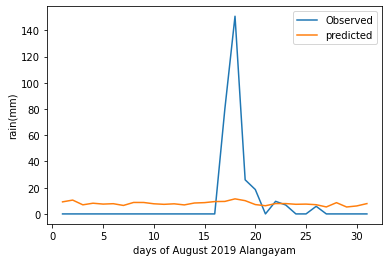

In [32]:
import matplotlib.pyplot as plt
fig=plt.plot(firstdf.day,firstdf.rain,label="Observed")
fig=plt.plot(firstdf.day,pred,label="predicted")
# plt.savefig("linear_reg.png")
plt.legend()
plt.xlabel("days of August 2019 Alangayam")
plt.ylabel("rain(mm)")
plt.savefig("svr.png",dpi=400)

In [22]:
plt.draw()
plt.show()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [17]:
plt.savefig("xgboost.jpeg")

<Figure size 432x288 with 0 Axes>

In [27]:
d={"orig":y_test,"pred_test":pred}
preddf=pd.DataFrame(d)


preddf[10:40].values

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 1.2       ,  0.        ],
       [ 0.        ,  0.        ],
       [ 3.6       , 11.59256268],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [13.        ,  3.37072515],
       [ 3.2       ,  2.44795179],
       [45.4       ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [49.        , 22.95454025],
       [ 3.        ,  4.80077457],
       [14.8       ,  3.11541271],
       [ 2.9       ,  0.        ],
       [ 1.2       ,  0.        ],
       [ 0.        ,  0.        ],
       [40.2       , 19.51211929],
       [ 0.        ,  0.        ],
       [ 6.9       ,  3.74354482],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [28]:
mean_absolute_error(preddf["orig"],preddf["pred_test"])

1.5726110230848696

In [40]:

xgb_r.save_model("modelsxgb.json")

In [6]:
loadtest = xg.XGBRegressor(objective ='reg:squarederror',    
                  n_estimators =3, seed = 123,max_depth=35,eta=0.3)
   

In [7]:
loadtest.load_model("modelsxgb.json")

In [19]:
import numpy as np
tt=[0]*29
print(tt)
loadtest.predict(np.array([np.array(tt)]))[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


0.1742031

In [18]:
x=[1,2,3]
x.extend([4,5,6])
x

[1, 2, 3, 4, 5, 6]

In [19]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
predreg=reg.predict(X_test)
print(mean_absolute_error(y_test,predreg))
print(np.sqrt(mean_squared_error(y_test,predreg)))
print(predreg)


3.527190546339279
8.215548842550367
[-0.33275986 -0.27088737 10.4577713  ...  3.31179047  2.35595131
  5.1163044 ]


In [41]:
def RAE(a,b):
    ans=((a-b)**2).sum()/(a**2).sum()
    return ans
def RRSE(a,b):
    mean=np.mean(a)
   
    ans=np.sqrt(((a-b)**2).sum()/((mean-a)**2).sum())
    return ans

In [46]:
a=np.array([3,4,8,10,10])
b=np.array([3,4.3,10,10,8])
RRSE(a,b)

0.42879323264673425

In [47]:
RAE(y_test,predsvr)
print(RRSE(y_test,predsvr))

1.0897710593270702


In [48]:
RRSE(y_test,predreg)

0.9591497698479747

In [10]:
np.corrcoef(y_test,predreg)

array([[1.        , 0.28293201],
       [0.28293201, 1.        ]])

In [27]:
a=np.array([1,2,3,9])
b=np.array([2,2,3,10])
np.sqrt(((a-b)**2).sum())/np.sqrt((a**2).sum())

0.14509525002200235

2.23606797749979

In [26]:
from sklearn.svm import LinearSVR
eps = 5
np.random.seed(2)
import time as time

svr = LinearSVR(epsilon=eps, C=0.1,)
a=time.time()
svr.fit(X_train,y_train)
b=time.time()

predsvr=svr.predict(X_test)
print(predsvr)
for i in range(len(predsvr)):
    if predsvr[i]<1:
        predsvr[i]=0
print(mean_absolute_error(y_test,predsvr))
print(np.sqrt(mean_squared_error(y_test,predsvr)))


[ 4.89127949  5.29260638 12.52968965 ...  7.6995444   5.76738849
  9.01094963]
6.92344100826768
9.334389441512773
C:\Users\om purohit\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [12]:
np.corrcoef(y_test,predsvr)

array([[1.        , 0.27942069],
       [0.27942069, 1.        ]])

In [41]:
import pickle

with open('DayMon.json', 'wb') as fp:
    pickle.dump(MonDay, fp)

In [2]:
import pickle
with open("DayMon.json","rb") as fp:
    toprint=pickle.load(fp)

In [3]:
toprint.keys()

ill_15_3', 'Ponnai_15_3', 'Katpadi_16_3', 'Natrampalli_16_3', 'TCS Mill_16_3', 'ACS Mill_16_3', 'VCS Mill_16_3', 'Ponnai_16_3', 'Katpadi_17_3', 'Natrampalli_17_3', 'TCS Mill_17_3', 'ACS Mill_17_3', 'VCS Mill_17_3', 'Ponnai_17_3', 'Katpadi_18_3', 'Natrampalli_18_3', 'TCS Mill_18_3', 'ACS Mill_18_3', 'VCS Mill_18_3', 'Ponnai_18_3', 'Katpadi_19_3', 'Natrampalli_19_3', 'TCS Mill_19_3', 'ACS Mill_19_3', 'VCS Mill_19_3', 'Ponnai_19_3', 'Katpadi_20_3', 'Natrampalli_20_3', 'TCS Mill_20_3', 'ACS Mill_20_3', 'VCS Mill_20_3', 'Ponnai_20_3', 'Katpadi_21_3', 'Natrampalli_21_3', 'TCS Mill_21_3', 'ACS Mill_21_3', 'VCS Mill_21_3', 'Ponnai_21_3', 'Katpadi_22_3', 'Natrampalli_22_3', 'TCS Mill_22_3', 'ACS Mill_22_3', 'VCS Mill_22_3', 'Ponnai_22_3', 'Katpadi_23_3', 'Natrampalli_23_3', 'TCS Mill_23_3', 'ACS Mill_23_3', 'VCS Mill_23_3', 'Ponnai_23_3', 'Katpadi_24_3', 'Natrampalli_24_3', 'TCS Mill_24_3', 'ACS Mill_24_3', 'VCS Mill_24_3', 'Ponnai_24_3', 'Katpadi_25_3', 'Natrampalli_25_3', 'TCS Mill_25_3', 'AC

In [47]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
X_test.columns

Index(['month', 'day', 'year', 'sparse1', 'sparse2', 'sparse3', 'sparse4',
       'sparse5', 'sparse6', 'sparse7', 'sparse8', 'District_ACS Mill',
       'District_Alangayam', 'District_Ambur', 'District_Arakkonam',
       'District_Arcot', 'District_Gudiyatham', 'District_Katpadi',
       'District_Kaveripakkam', 'District_Melalathur', 'District_Natrampalli',
       'District_Ponnai', 'District_Sholingur', 'District_TCS Mill',
       'District_Tirupattur', 'District_VCS Mill', 'District_Vaniyambadi',
       'District_Vellore', 'District_Wallajah'],
      dtype='object')

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("converted.csv")

In [3]:
dfg=df.groupby(["District","year"]).mean().reset_index()
dfg

,District,year,rain,month,day
0,ACS Mill,2018,1.632609,11.000000,15.836957
1,ACS Mill,2019,2.486575,6.526027,15.720548
2,Alangayam,2010,2.781644,6.526027,15.720548
3,Alangayam,2011,2.627123,6.526027,15.720548
4,Alangayam,2012,2.923361,6.513661,15.756831
...,...,...,...,...,...
127,Wallajah,2015,2.616986,6.526027,15.720548
128,Wallajah,2016,1.008743,6.513661,15.756831
129,Wallajah,2017,2.004384,6.526027,15.720548
130,Wallajah,2018,1.155890,6.526027,15.720548


In [38]:
df=df[(df["year"]==2014)&(df["District"]=='Arcot')]

In [40]:
df.groupby(["District","year","month"]).mean().reset_index()

,District,year,month,rain,day
0,Arcot,2014,1,0.000000,16.0
1,Arcot,2014,2,0.000000,14.5
2,Arcot,2014,3,0.000000,16.0
3,Arcot,2014,4,0.000000,15.5
4,Arcot,2014,5,2.358065,16.0
5,Arcot,2014,6,0.000000,15.5
6,Arcot,2014,7,2.048387,16.0
7,Arcot,2014,8,3.774194,16.0
8,Arcot,2014,9,4.960000,15.5
9,Arcot,2014,10,4.119355,16.0
